TRAIN_DIR: C:\Users\lenovo\OneDrive\Bureau\Cycle 2\S1\Deep Learning\Projet\FaceMaskDataset\FaceMaskDataset\train224
TEST_DIR : C:\Users\lenovo\OneDrive\Bureau\Cycle 2\S1\Deep Learning\Projet\FaceMaskDataset\FaceMaskDataset\test224
Found 5944 files belonging to 2 classes.
Using 4756 files for training.
Found 5944 files belonging to 2 classes.
Using 4756 files for training.
Found 5944 files belonging to 2 classes.
Using 1188 files for validation.
Found 5944 files belonging to 2 classes.
Using 1188 files for validation.
Found 3060 files belonging to 2 classes.
Classes : ['face', 'maskface']
Found 3060 files belonging to 2 classes.
Classes : ['face', 'maskface']


TRAIN_DIR: C:\Users\lenovo\OneDrive\Bureau\Cycle 2\S1\Deep Learning\Projet\FaceMaskDataset\FaceMaskDataset\train224
TEST_DIR : C:\Users\lenovo\OneDrive\Bureau\Cycle 2\S1\Deep Learning\Projet\FaceMaskDataset\FaceMaskDataset\test224
Found 5944 files belonging to 2 classes.
Using 4756 files for training.
Found 5944 files belonging to 2 classes.
Using 4756 files for training.
Found 5944 files belonging to 2 classes.
Using 1188 files for validation.
Found 5944 files belonging to 2 classes.
Using 1188 files for validation.
Found 3060 files belonging to 2 classes.
Classes : ['face', 'maskface']
Found 3060 files belonging to 2 classes.
Classes : ['face', 'maskface']


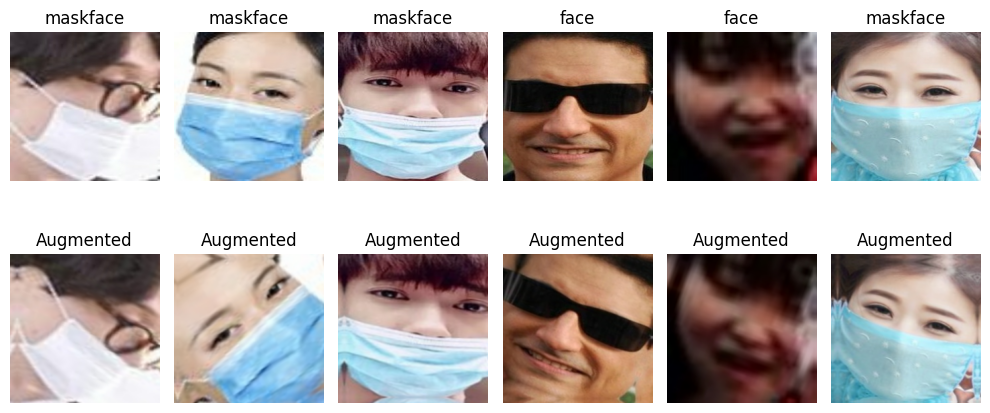

In [2]:
from load import load_data

train_ds, val_ds, test_ds, class_names, data_augmentation, IMG_SIZE, BATCH_SIZE = load_data(show_examples=True)

# Modèle 4 – CNN profond (architecture et résultats)

 Architecture du modèle

Ce modèle est un **CNN profond construit from scratch**, sans backbone pré-entraîné.

- **Prétraitement**
  - `data_augmentation` → plus de variété dans les images d’entraînement.
  - `Rescaling(1./255)` → normalisation des pixels dans [0,1].

- **5 blocs convolutionnels** successifs :

  - **Bloc 1** : Conv2D(32) ×2 + BatchNorm + ReLU + MaxPool + Dropout(0.25)
  - **Bloc 2** : Conv2D(64) ×2 + BatchNorm + ReLU + MaxPool + Dropout(0.25)
  - **Bloc 3** : Conv2D(128) ×2 + BatchNorm + ReLU + MaxPool + Dropout(0.3)
  - **Bloc 4** : Conv2D(256) ×2 + BatchNorm + ReLU + MaxPool + Dropout(0.4)
  - **Bloc 5** : Conv2D(512) ×2 + BatchNorm + ReLU + MaxPool + Dropout(0.5)

  → On augmente progressivement le nombre de filtres pour apprendre des caractéristiques de plus en plus complexes, avec **BatchNorm** pour stabiliser et **Dropout** croissant pour limiter le sur-apprentissage.

- **Tête de classification**
  - `GlobalAveragePooling2D`
  - Dense(512) + BatchNorm + ReLU + Dropout(0.5)
  - Dense(256) + BatchNorm + ReLU + Dropout(0.3)
  - Dense(1, sigmoid) → probabilité d’être `maskface`.

Ce modèle est donc un **CNN profond entièrement entraîné sur notre dataset**, sans knowledge externe ImageNet.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = IMG_SIZE + (3,)

model4 = keras.Sequential(
    [
        layers.Input(shape=input_shape),

        # Data augmentation
        data_augmentation,

        # Normalisation [0, 1]
        layers.Rescaling(1./255),

        # Bloc 1 : 32 filtres
        layers.Conv2D(32, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(32, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Bloc 2 : 64 filtres
        layers.Conv2D(64, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(64, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Bloc 3 : 128 filtres
        layers.Conv2D(128, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(128, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Bloc 4 : 256 filtres
        layers.Conv2D(256, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(256, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        # Bloc 5 : 512 filtres
        layers.Conv2D(512, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Conv2D(512, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        # Tête de classification
        layers.GlobalAveragePooling2D(),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.5),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation("relu"),
        layers.Dropout(0.3),
        layers.Dense(1, activation="sigmoid")
    ],
    name="deep_cnn"
)

model4.summary()

Model: "deep_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
Model: "deep_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 224

## Compilation + callbacks (Modèle 4)

On utilise :
- Adam avec learning rate 1e-3,
- binary_crossentropy,
- accuracy, precision, recall,
- sauvegarde du meilleur modèle,
- EarlyStopping + ReduceLROnPlateau.

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model4.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
    ]
)

checkpoint_m4 = ModelCheckpoint(
    "models/deep_cnn_best.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

early_stop_m4 = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_m4 = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1
)

## Entraînement du Modèle 4 (CNN profond)

In [5]:
EPOCHS = 25

history_m4 = model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[checkpoint_m4, early_stop_m4, reduce_lr_m4],
    verbose=1
)

Epoch 1/25
298/298 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.8057 - precision: 0.8186 - recall: 0.7811
Epoch 1: val_loss improved from inf to 2.57771, saving model to models\deep_cnn_best.h5

Epoch 1: val_loss improved from inf to 2.57771, saving model to models\deep_cnn_best.h5
298/298 [==============================] - 122s 340ms/step - loss: 0.4605 - accuracy: 0.8057 - precision: 0.8186 - recall: 0.7811 - val_loss: 2.5777 - val_accuracy: 0.4823 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/25
Epoch 2/25
298/298 [==============================] - ETA: 0s - loss: 0.3830 - accuracy: 0.8478 - precision: 0.8389 - recall: 0.8574
Epoch 2: val_loss improved from 2.57771 to 1.82008, saving model to models\deep_cnn_best.h5

Epoch 2: val_loss improved from 2.57771 to 1.82008, saving model to models\deep_cnn_best.h5
298/298 [==============================] - 97s 327ms/step - loss: 0.3830 - accuracy: 0.8478 - precision: 0.8389 - recal

## Courbes Loss & Accuracy (Modèle 4)

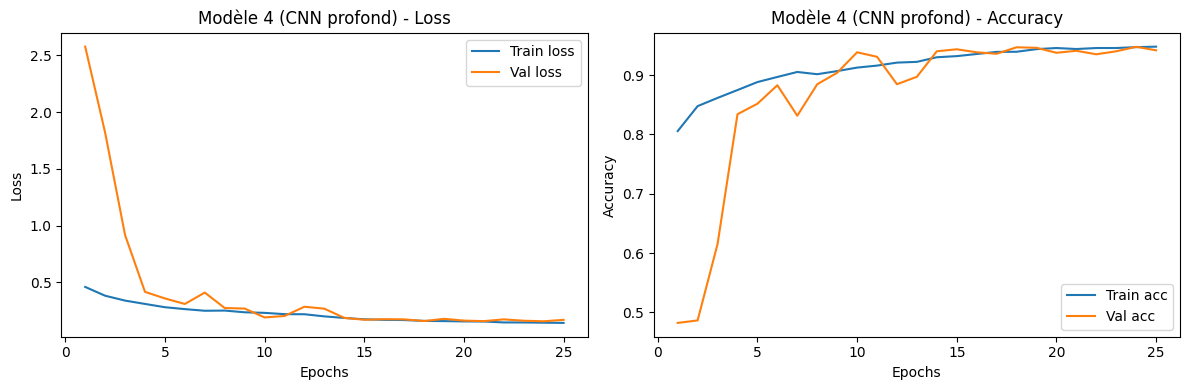

In [6]:
from load import plot_history
plot_history(history_m4, title_prefix="Modèle 4 (CNN profond)")

## Évaluation sur le test (Modèle 4)

In [7]:
test_results_m4 = model4.evaluate(test_ds, verbose=1)

print("\nRésultats Modèle 4 (CNN profond) :")
for name, value in zip(model4.metrics_names, test_results_m4):
    print(f"{name}: {value:.4f}")

192/192 [==============================] - 12s 61ms/step - loss: 0.1663 - accuracy: 0.9467 - precision: 0.9057 - recall: 0.9414

Résultats Modèle 4 (CNN profond) :
loss: 0.1663
accuracy: 0.9467
precision: 0.9057
recall: 0.9414

Résultats Modèle 4 (CNN profond) :
loss: 0.1663
accuracy: 0.9467
precision: 0.9057
recall: 0.9414


## Matrice de confusion et rapport de classification (Modèle 4)

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
for _, labels in test_ds:
    y_true.append(labels.numpy())
y_true = np.concatenate(y_true, axis=0)

y_pred_proba = model4.predict(test_ds)
y_pred = (y_pred_proba.ravel() > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

192/192 [==============================] - 10s 51ms/step
Confusion Matrix:
 [[1917  102]
 [  61  980]]

Classification Report:
              precision    recall  f1-score   support

        face       0.97      0.95      0.96      2019
    maskface       0.91      0.94      0.92      1041

    accuracy                           0.95      3060
   macro avg       0.94      0.95      0.94      3060
weighted avg       0.95      0.95      0.95      3060

Confusion Matrix:
 [[1917  102]
 [  61  980]]

Classification Report:
              precision    recall  f1-score   support

        face       0.97      0.95      0.96      2019
    maskface       0.91      0.94      0.92      1041

    accuracy                           0.95      3060
   macro avg       0.94      0.95      0.94      3060
weighted avg       0.95      0.95      0.95      3060



### Interprétation des courbes (Loss / Accuracy)

- **Loss**
  - La **loss d’entraînement** diminue rapidement puis se stabilise à une valeur très basse.
  - La **loss de validation** commence très haute mais chute fortement durant les premiers epochs, puis se rapproche de la loss d’entraînement.
  - À partir d’environ 10–15 epochs, les deux courbes sont proches et presque plates → apprentissage stable, pas d’overfitting massif.

- **Accuracy**
  - L’**accuracy d’entraînement** passe rapidement de ~0.8 à >0.94.
  - L’**accuracy de validation** démarre très bas, puis rattrape et dépasse 0.9, pour atteindre ≈0.95 à la fin.
  - Les petites oscillations de la courbe de validation sont normales pour un modèle profond avec data augmentation.

👉 Les courbes montrent qu’après une phase d’adaptation au début, le modèle **généralise bien** et converge vers une forte performance.

---

#### Interprétation des métriques et de la matrice de confusion

- **Scores globaux (test)**
  - `loss = 0.1663`
  - `accuracy ≈ 94,67 %`
  - `precision ≈ 0.91`
  - `recall ≈ 0.94`

- **Par classe**
  - `face` : precision = 0.97, recall = 0.95, f1 = 0.96  
  - `maskface` : precision = 0.91, recall = 0.94, f1 = 0.92  

  → Les deux classes sont très bien équilibrées, avec des f1-scores élevés.

- **Matrice de confusion**
  - TN (face → face) = 1917  
  - FP (face → maskface) = 102  
  - FN (maskface → face) = 61  
  - TP (maskface → maskface) = 980  

  → Le modèle fait :
  - relativement peu de **faux positifs** (visages sans masque prédits comme `maskface`),
  - peu de **faux négatifs** (visages avec masque prédits comme `face`).

---

#### Conclusion pour le Modèle 4

Le **CNN profond** :

- atteint une **accuracy comparable aux meilleurs VGG fine-tunés (~95%)**,  
- garde des métriques très équilibrées face / maskface,  
- montre des courbes train/val stables.

C’est donc un **modèle très compétitif**, qui prouve qu’un CNN bien conçu from scratch peut rivaliser avec des architectures pré-entraînées sur ImageNet dans cette tâche de détection de masque.